In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 模擬資料做SVM

In [62]:
x=np.array([[6,6],[10,8],[3,7],[8,7]])

In [63]:
x

array([[ 6,  6],
       [10,  8],
       [ 3,  7],
       [ 8,  7]])

In [64]:
x[:,0]

array([ 6, 10,  3,  8])

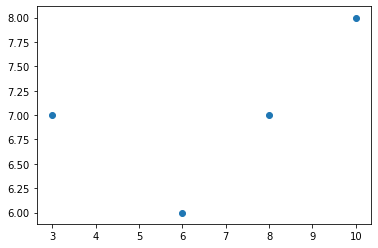

In [65]:
plt.scatter(x[:,0],x[:,1])

In [66]:
y=np.array([1,2,1,2])

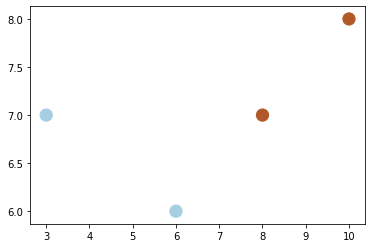

In [67]:
plt.scatter(x[:,0],x[:,1],c=y,cmap="Paired",s=150)

## Step1 打開函數學習機

In [68]:
from sklearn.svm import SVC

In [69]:
clf=SVC(gamma='auto')

## Step2 學習

In [70]:
clf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Step 3 預測

In [71]:
y_predict=clf.predict(x)

In [72]:
y_predict

array([1, 2, 1, 2])

In [74]:
xr=np.random.rand(100)*7+3
yr=np.random.rand(100)*2+6

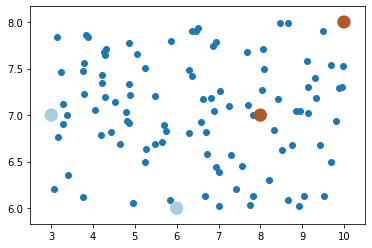

In [75]:
plt.scatter(xr,yr)
plt.scatter(x[:,0],x[:,1],c=y,cmap="Paired",s=150)

In [76]:
print("X",xr[:5])
print("Y",yr[:5])

X [9.87065826 9.96249145 6.70204869 5.70498965 3.36591994]
Y [7.28591266 7.30236953 6.81804799 6.89062001 7.00478385]


In [77]:
#合併xr,yr
X=np.c_[xr,yr]
Y=clf.predict(X)

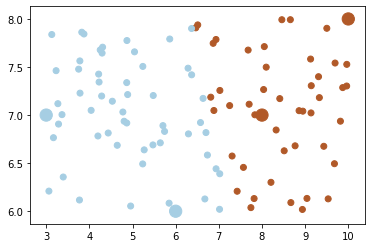

In [78]:
plt.scatter(x[:,0],x[:,1],c=y,cmap="Paired",s=150)
plt.scatter(X[:,0],X[:,1],c=Y,cmap="Paired")

## 結果呈現

In [79]:
x_list=np.linspace(3,10,50)
y_list=np.linspace(6,8,50)

In [81]:
X=np.c_[x_list,y_list]

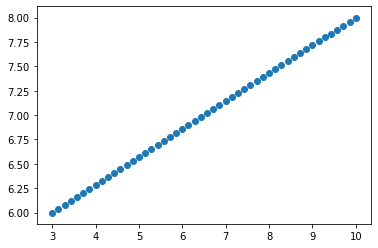

In [84]:
plt.scatter(X[:,0],X[:,1])# Fail 不是我們要的內容

## meshgrid概念：產生格點

In [85]:
X,Y=np.meshgrid(x_list,y_list)

In [88]:
X.ravel(),Y.ravel()

(array([ 3.        ,  3.14285714,  3.28571429, ...,  9.71428571,
         9.85714286, 10.        ]), array([6., 6., 6., ..., 8., 8., 8.]))

In [91]:
P=np.c_[X.ravel(),Y.ravel()]

In [92]:
C=clf.predict(P)

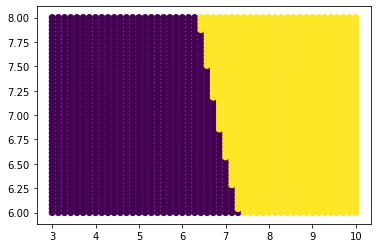

In [93]:
plt.scatter(P[:,0],P[:,1],c=C)

### countour（等高線） 的用法

In [94]:
xL=np.array([1,2,3,4])
yL=np.array([5,6,7,8])

In [95]:
X,Y=np.meshgrid(xL,yL)

In [96]:
X

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [97]:
Y

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8]])

In [98]:
Z=np.random.randint(1,3,(4,4))

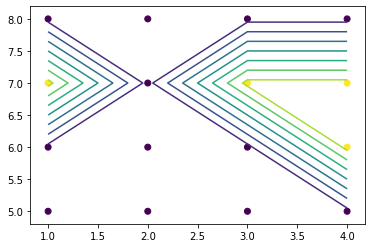

In [105]:
plt.contour(X,Y,Z)
plt.scatter(X.ravel(),Y.ravel(),c=Z.ravel())

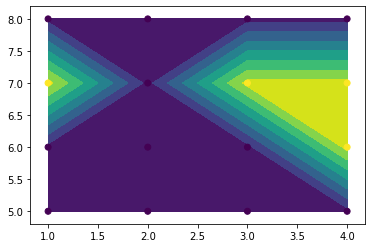

In [106]:
plt.contourf(X,Y,Z)
plt.scatter(X.ravel(),Y.ravel(),c=Z.ravel())

## 資料視覺化終極版

In [123]:
x_arr=np.arange(2.5,10.5,0.02)
y_arr=np.arange(5.5,8.5,0.02)
X,Y=np.meshgrid(x_arr,y_arr)
P=np.c_[X.ravel(),Y.ravel()]
z=clf.predict(P)
Z=z.reshape(X.shape)#z 的資料格式要和X的一樣

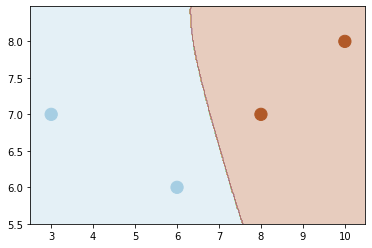

In [127]:
plt.contourf(X,Y,Z,cmap="Paired",alpha=0.3)
plt.scatter(x[:,0],x[:,1],c=y,cmap="Paired",s=150)

# 實際資料分析＿鳶尾花數據庫

In [131]:
from sklearn.datasets import load_iris

In [132]:
iris=load_iris()

In [134]:
# 鳶尾花數據內容資料
#print(iris.DESCR)

In [136]:
x=iris.data
y=iris.target

In [137]:
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [139]:
y[:5]

array([0, 0, 0, 0, 0])

In [143]:
X=x[:,0:2]
Y=y

## 區分訓練、測試資料

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=8)

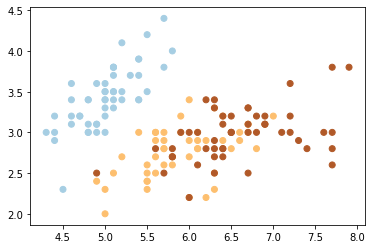

In [147]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap="Paired")

## step1 開一台函數學習機

In [149]:
clf=SVC(gamma="auto")

## step2 訓練

In [151]:
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## step3預測

In [152]:
y_predict=clf.predict(x_test)

In [155]:
y_predict-y_test

array([ 0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  1,  0, -1,  1, -1, -1,  0,
       -1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0])

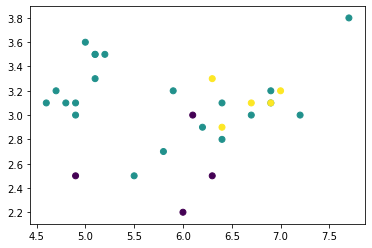

In [157]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_predict-y_test)
#黃色紫色都是錯誤預測的

In [158]:
x0=np.arange(3.8,8.2,0.02)
y0=np.arange(1.8,4.7,0.02)

In [161]:
xm,ym=np.meshgrid(x0,y0)
P=np.c_[xm.ravel(),ym.ravel()]
z=clf.predict(P)

In [162]:
Z=z.reshape(xm.shape)

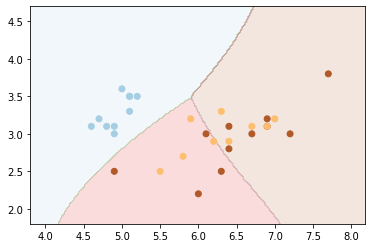

In [171]:
plt.contourf(xm,ym,Z,cmap="Paired",alpha=0.15)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap="Paired")